In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load dataset (using Iris dataset as an example)
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [ ]:
# Split dataset into train and test sets
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
# Train a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Model evaluation
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n")

Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89        15
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45

Confusion Matrix:



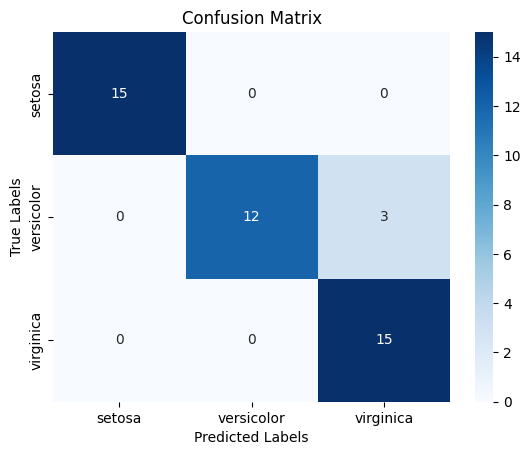

In [ ]:
# Plot Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

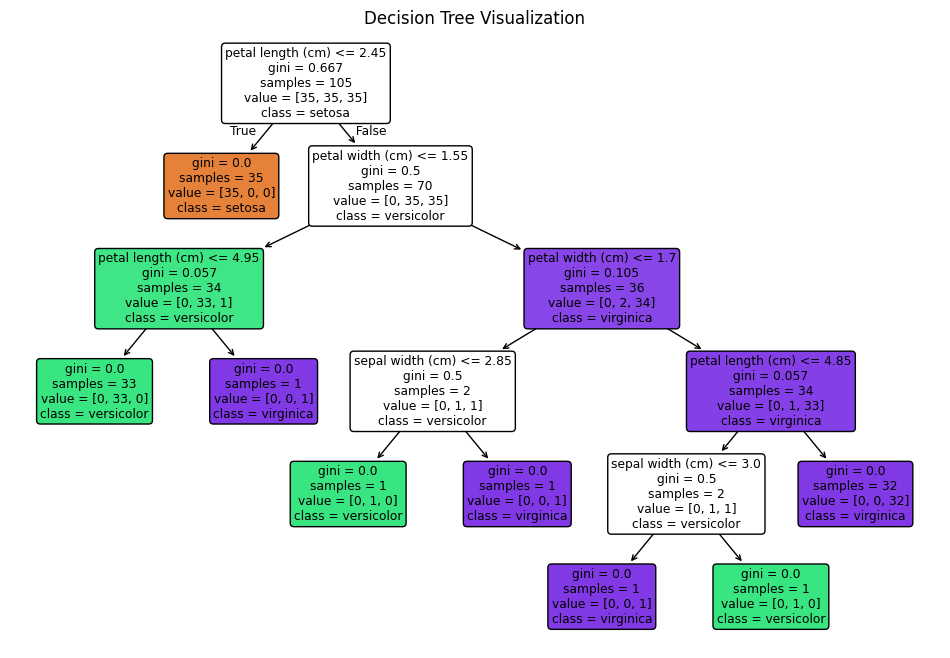

In [ ]:
# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=data.feature_names, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [ ]:
# Export the tree as text
print("Decision Tree Rules:\n")
print(export_text(dt_model, feature_names=data.feature_names))

Decision Tree Rules:

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.55
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.55
|   |   |--- petal width (cm) <= 1.70
|   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  2.85
|   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.70
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



In [ ]:
# Feature importance analysis
feature_importances = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:\n", feature_importances)


Feature Importance:
              Feature  Importance
2  petal length (cm)    0.541176
3   petal width (cm)    0.430252
1   sepal width (cm)    0.028571
0  sepal length (cm)    0.000000


<ipython-input-10-14bb7ed49dc2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


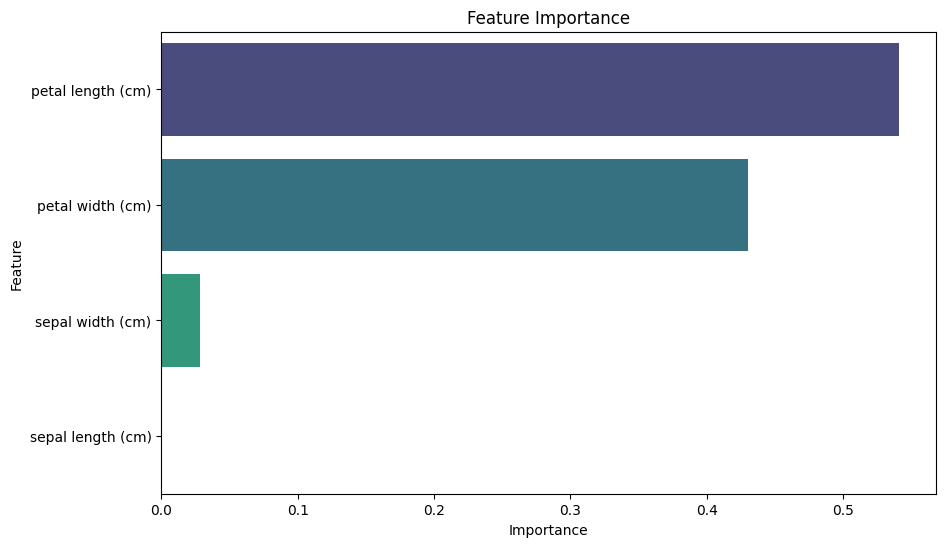

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()